## AN EXAMPLE SIMULATION

This is an example simulation to test out the functioning of the simulation library

In [1]:
# IMPORT MODULES

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from src.ringtrap_python.molecular_dynamics import sim_leapfrog
from src.ringtrap_python.potentials import LocalHarmonicPotential1D, InverseSquarePotential1D
from src.ringtrap_python.eigenmodes import get_linear_eq_pos

### 1 ATOM 1D HARMONIC POTENTIAL

Here we implement a single atom in a 1D harmonic potential and compare with theory.
For a 1D harmonic oscillator, $\omega = \sqrt{\frac{k}{m}}$.

So for a particle of mass 2kg and spring constant 10N/m, $\omega = \sqrt{5}$.
If the particle started off at $X_0 = 3.5$ m with 0 velocity then the particle should oscillate with a mixmum amplitude of 3.5m

In [2]:
mpl.rc('xtick',labelsize=16)
mpl.rc('ytick',labelsize=16)

In [3]:
# ENSEMBLE DEFINITIONS
"""
n       : The number of particles in the simulation
charge  : Charge of the particle in C
mass    : Mass of the particle in kg
"""
ensemble_prop = {
    "n" : 1,
    "charge" : 1,
    "mass": 2
}

n = ensemble_prop["n"]

# Angular frequency
w = np.array([np.sqrt(5.0)])

# Initial position
x0 = np.array([3.5])

# Initial velocity
v0 = np.array([0.0])

In [4]:
# Creates local 1D harmonic potential around origin with frequency w
potentials = [LocalHarmonicPotential1D(w)]

In [5]:
# SIMULATION SETUP

# Total time
T = 2.9

# Time step
dt = 1e-3

x,v,a = sim_leapfrog(T,dt,x0,v0,ensemble_prop,potentials,language='c++',dims=1)
t = np.linspace(0,T,int(T/dt)+1)

In [6]:
print(potentials[0].potential(x[:,0],ensemble_prop))

91557.05607948705


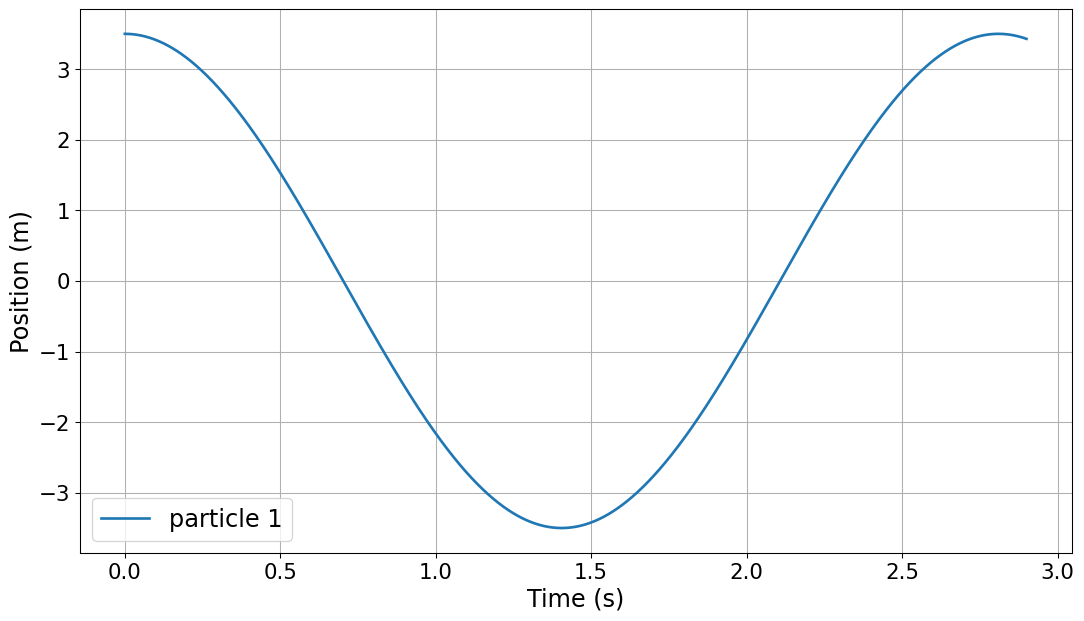

In [7]:
# PLOTTING
plt.figure(figsize=(13.33,7.5),dpi=96)

plt.grid()
plt.plot(t,x,label='particle 1',linewidth=2)
plt.xlabel('Time (s)',fontsize=18)
plt.ylabel('Position (m)',fontsize=18)
plt.legend(fontsize=18)
plt.rcParams['figure.figsize'] = [10/2.54, 8/2.54]
plt.show()

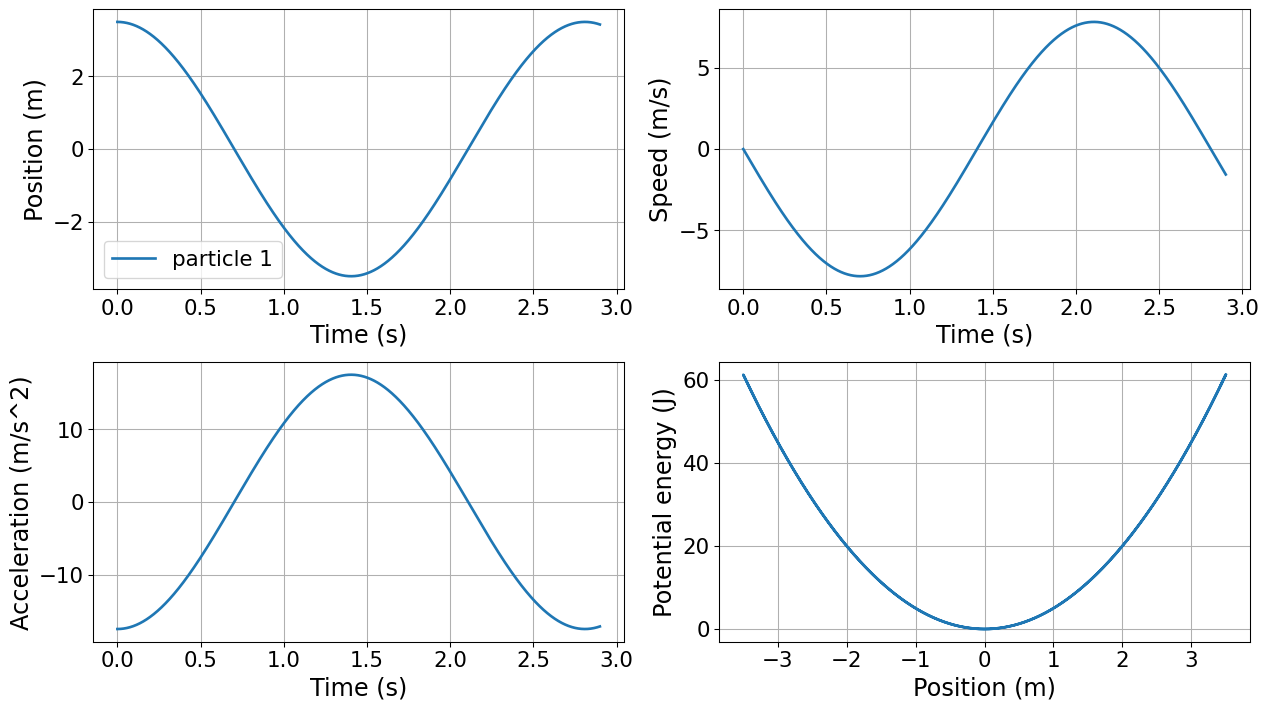

In [8]:
plt.figure(figsize=(13.33,7.5),dpi=96)

plt.subplot(221)
plt.grid()
plt.plot(t,x,label='particle 1',linewidth=2)
plt.xlabel('Time (s)',fontsize=18)
plt.ylabel('Position (m)',fontsize=18)
plt.legend(fontsize=16)

plt.subplot(222)
plt.grid()
plt.plot(t,v,linewidth=2)
plt.xlabel('Time (s)',fontsize=18)
plt.ylabel('Speed (m/s)',fontsize=18)

plt.subplot(223)
plt.grid()
plt.plot(t,a,linewidth=2)
plt.xlabel('Time (s)',fontsize=18)
plt.ylabel('Acceleration (m/s^2)',fontsize=18)

plt.subplot(224)
plt.grid()
plt.plot(x[:,0],[potentials[0].potential(i,ensemble_prop) for i in x],linewidth=2)
plt.xlabel('Position (m)',fontsize=18)
plt.ylabel('Potential energy (J)',fontsize=18)

plt.tight_layout()
plt.show()

### 2 DIFFERENT ATOMS IN A 1D HARMONIC POTENTIAL

Consider 2 particles of different masses trapped in the same harmonic poential starting from the same extreme point. Let the mass of the 2nd particle be 1/3rd the mass of the 1st

In [41]:
# ENSEMBLE DEFINITIONS
"""
n       : The number of particles in the simulation
charge  : Charge of the particle in C
mass    : Mass of the particle in kg
"""
ensemble_prop = {
    "n" : 2,
    "charge" : np.array([1.0,1.0]),
    "mass": np.array([2.0,2.0/3])
}

n = ensemble_prop["n"]

# Angular frequency
w = np.array([np.sqrt(5.0) , np.sqrt(15.0)])

# Initial position
x0 = np.array([3.5 , 3.5])

# Initial velocity
v0 = np.array([0.0, 0.0])

In [42]:
# Creates local 1D harmonic potential around origin with frequency w
potentials = [LocalHarmonicPotential1D(w)]

In [43]:
print(x)

[[ 3.5         3.5       ]
 [ 3.49999125  3.49999708]
 [ 3.499965    3.49998833]
 ...
 [ 3.43234399 -2.88924859]
 [ 3.43080405 -2.88669594]
 [ 3.42924695 -2.88413848]]


In [44]:
# SIMULATION SETUP

# Total time
T = 2.9

# Time step
dt = 1e-3

x,v,a = sim_leapfrog(T,dt,x0,v0,ensemble_prop,potentials,language='python',dims=1)
t = np.linspace(0,T,int(T/dt)+1)

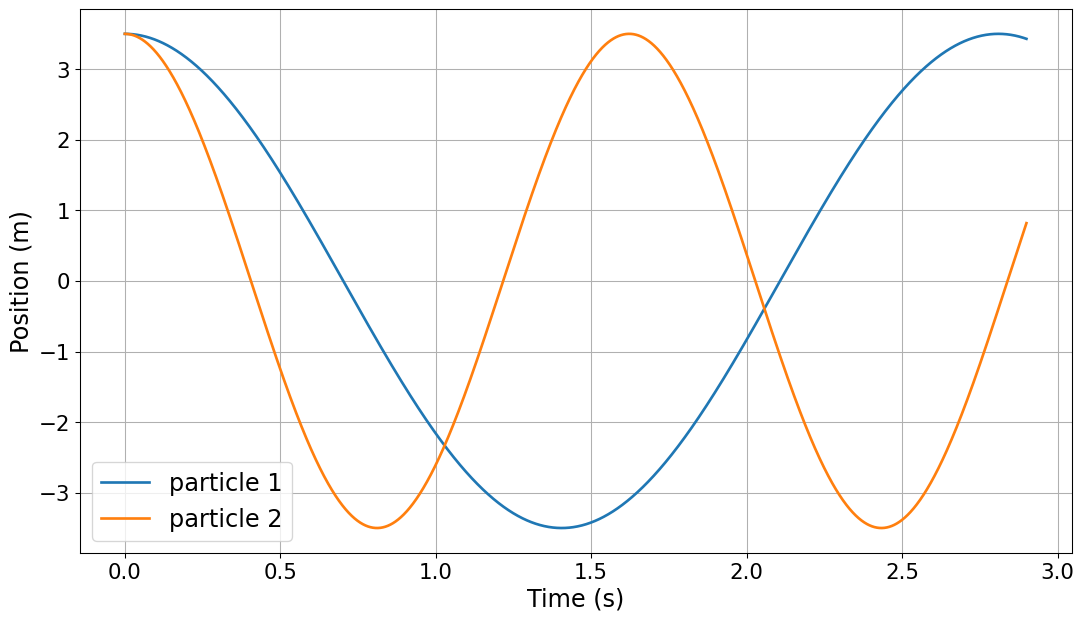

In [45]:
# PLOTTING
plt.figure(figsize=(13.33,7.5),dpi=96)

plt.grid()
for i in range(n):
    plt.plot(t,x[:,i],label='particle '+str(i+1),linewidth=2)
plt.xlabel('Time (s)',fontsize=18)
plt.ylabel('Position (m)',fontsize=18)
plt.legend(fontsize=18)
plt.rcParams['figure.figsize'] = [10/2.54, 8/2.54]
plt.show()

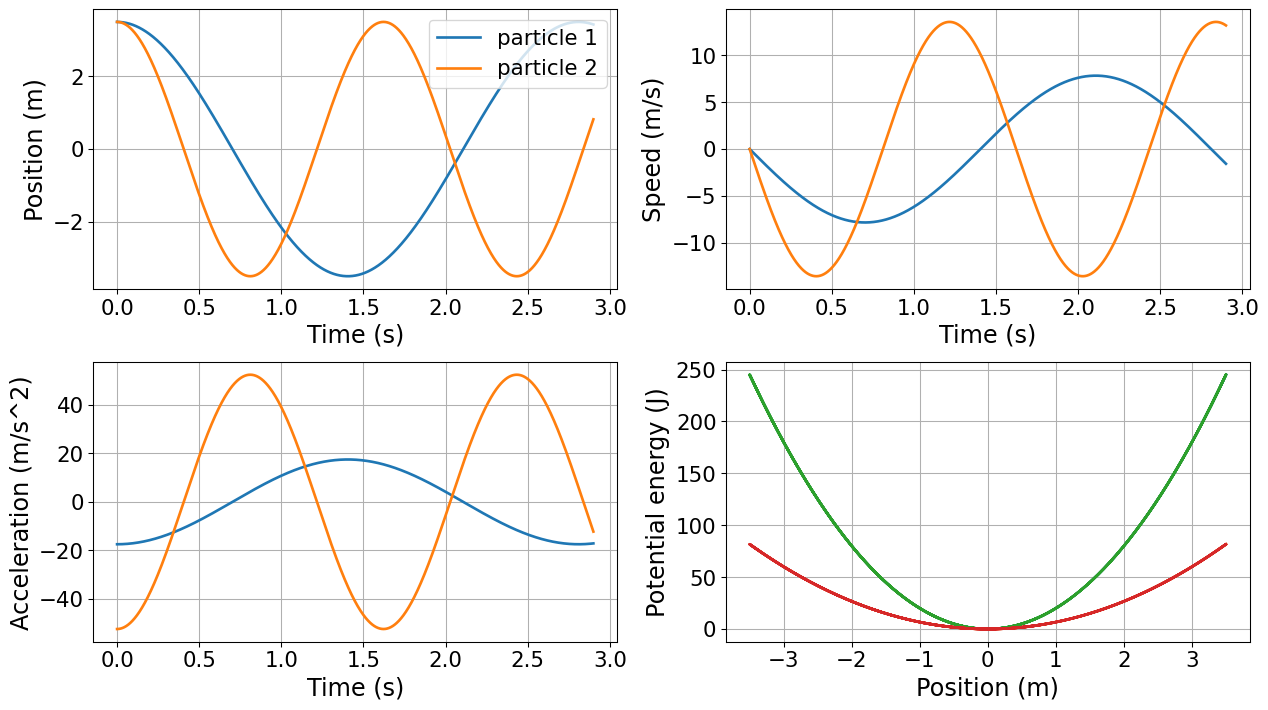

In [47]:
plt.figure(figsize=(13.33,7.5),dpi=96)

plt.subplot(221)
plt.grid()
for i in range(n):
    plt.plot(t,x[:,i],label='particle '+str(i + 1),linewidth=2)
plt.xlabel('Time (s)',fontsize=18)
plt.ylabel('Position (m)',fontsize=18)
plt.legend(fontsize=16,loc='upper right')

plt.subplot(222)
plt.grid()
for i in range(n):
    plt.plot(t,v[:,i],linewidth=2)
plt.xlabel('Time (s)',fontsize=18)
plt.ylabel('Speed (m/s)',fontsize=18)

plt.subplot(223)
plt.grid()
for i in range(n):
    plt.plot(t,a[:,i],linewidth=2)
plt.xlabel('Time (s)',fontsize=18)
plt.ylabel('Acceleration (m/s^2)',fontsize=18)

plt.subplot(224)
plt.grid()
for i in range(n):
    plt.plot(x[:,i],[potentials[0].potential(j,ensemble_prop) for j in x[:,i]],linewidth=2)
plt.xlabel('Position (m)',fontsize=18)
plt.ylabel('Potential energy (J)',fontsize=18)

plt.tight_layout()
plt.show()

### 2 IDENTICAL CHARGES COLOUMB POTENTIAL

Here we compare 2 identical charged atoms for their coloumb interaction

### 2 CHARGED PARTICLES DIFFERENT MASS

Here we compare 2 charges of different masses for their coloumbic interactions